In [1]:
import pandas as pd
import copy
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.utils import resample
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df=pd.read_csv("train(1).csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [3]:
df.head()
Unique_value_df=pd.DataFrame(columns=['Type','Number of Unique Values'])
index_count=0
binary_count={}
for x in df.columns:
    set_var=sorted(list(set(df[x])))
    neg_val='no'
    for negi in set_var:
        if negi<0:
            neg_val='yes'
    b=copy.deepcopy(set_var)
    c=copy.deepcopy(set_var)
    b.remove(b[-1])
    c.remove(c[0])
    b=np.array(b)
    c=np.array(c)
    d=np.array(c-b)
    p=set(np.around(d,decimals=1))
    if (len(p)>1):
        if x=="ps_reg_01":
            print(b,c,p)
        variable_type='Quantitative'
    else:
        diff=p.pop()
        min_set,max_set=min(set_var),max(set_var)
        y=min_set
        temp_list=[]
        temp_list.append(max_set)
        while(y>=max_set):
            temp_list.append(y)
            y+=diff
        temp_set=set(temp_list)
        if (bool(temp_set-set(set_var))==False) and (diff==1):
            if (len(set_var)==2):
                variable_type='Binary'
            elif (len(set_var)>2):
                variable_type='Ordinal'
                
        else:
            variable_type='Interval'
    
    row=pd.DataFrame([[int(df[x].isna().sum()),len(set(df[x])),x,variable_type,neg_val]],columns=['Nan_Count','Number of Unique Values','Type','Type_Variable','Contains_Negative'], index=[index_count])
    Unique_value_df=Unique_value_df.append(row)
    index_count+=1
    if variable_type=='Binary':
        binary_count.update(OrderedDict({x:{"zeros":df[x].value_counts()[0],"ones":df[x].value_counts()[1],"zero's_percent":df[x].value_counts(normalize=True)[0]*100,"one's_percent":df[x].value_counts(normalize=True)[1]*100}}))
        
temp=pd.DataFrame(list(binary_count.values()),index=[list(binary_count.keys())])
temp.reset_index(level=0,inplace=True)
temp.rename(columns={'level_0':'Type'},inplace=True)

binary_group=Unique_value_df[Unique_value_df['Type_Variable']=='Binary']
binary_group=copy.deepcopy(binary_group)
binary_group.reset_index(level=0,inplace=True)
categorical_group=Unique_value_df[Unique_value_df['Type_Variable']=='Ordinal']
binary_group_summary=pd.merge(temp,binary_group,on='Type')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
print(binary_group_summary)
print()
print(Unique_value_df)

              Type  one's_percent    ones  zero's_percent   zeros  index  \
0           target       3.644752   21694       96.355248  573518      1   
1    ps_ind_06_bin      39.374206  234360       60.625794  360852      7   
2    ps_ind_07_bin      25.703279  152989       74.296721  442223      8   
3    ps_ind_08_bin      16.392143   97568       83.607857  497644      9   
4    ps_ind_09_bin      18.530372  110295       81.469628  484917     10   
5    ps_ind_10_bin       0.037298     222       99.962702  594990     11   
6    ps_ind_11_bin       0.169183    1007       99.830817  594205     12   
7    ps_ind_12_bin       0.943865    5618       99.056135  589594     13   
8    ps_ind_13_bin       0.094756     564       99.905244  594648     14   
9    ps_ind_16_bin      66.082337  393330       33.917663  201882     17   
10   ps_ind_17_bin      12.108123   72069       87.891877  523143     18   
11   ps_ind_18_bin      15.344617   91333       84.655383  503879     19   
12   ps_car_

In [5]:
set(df['ps_calc_01'])

{0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}

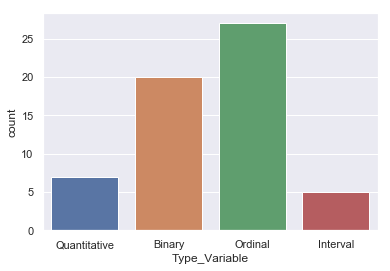

In [6]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Type_Variable", data=Unique_value_df)

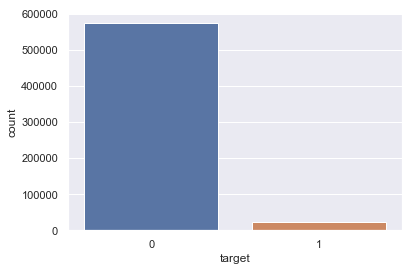

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(x="target", data=df)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

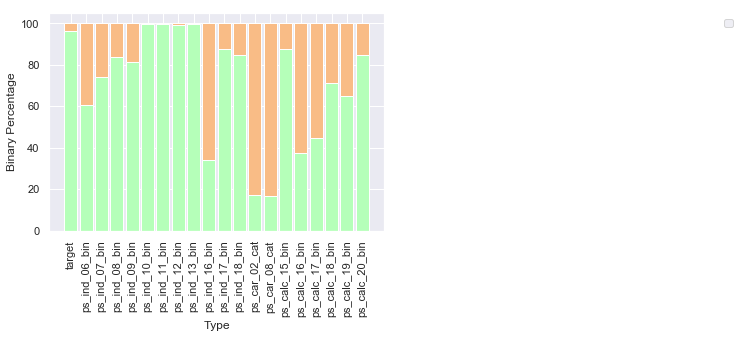

In [8]:
tit=list(binary_group_summary['Type'])
plt.bar(tit,binary_group_summary["zero's_percent"],color='#b5ffb9', edgecolor='white', width=0.85)
plt.bar(tit,binary_group_summary["one's_percent"],bottom=binary_group_summary["zero's_percent"],color='#f9bc86', edgecolor='white', width=0.85)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('Type')
plt.ylabel('Binary Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(2,1), ncol=1)
plt.show

In [9]:
def downsample(one_samp_percent):
    tot=int(len(df[df['target']==1])/one_samp_percent*100)
    zero_samp_percent=tot-int(len(df[df['target']==1]))
    df_zero=df[df['target']==0]
    df_majority_downsampled = resample(df_zero, replace=False,n_samples=zero_samp_percent,random_state=123)
    df_downsample=pd.concat([df_majority_downsampled,df[df['target']==1]])
    return df_downsample

downsample_by_zero=downsample(12)
print(downsample_by_zero['target'].value_counts(normalize=True))
print(len(downsample_by_zero))

0    0.88
1    0.12
Name: target, dtype: float64
180783


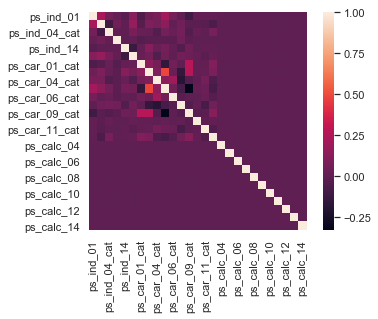

[]
{'target'}


,ps_ind_01,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_14,ps_ind_15,ps_car_01_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
ps_ind_01,1.000000,0.223408,0.066645,0.014823,-0.024971,0.122137,-0.056121,0.043756,0.079042,0.213009,...,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891
ps_ind_03,0.223408,1.000000,-0.095856,0.053250,0.001990,0.170449,-0.028520,0.095658,0.072990,0.143597,...,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205
ps_ind_04_cat,0.066645,-0.095856,1.000000,0.013053,-0.000691,0.077071,0.029379,0.022744,-0.045361,0.063399,...,0.001028,0.002626,-0.000151,-0.002776,0.000487,1.272742e-04,-0.002001,-0.000814,0.000283,0.001565
ps_ind_05_cat,0.014823,0.053250,0.013053,1.000000,-0.001013,0.012326,-0.036213,-0.011399,-0.010873,-0.006562,...,-0.000642,-0.000249,-0.001902,-0.000145,-0.000822,-1.069873e-03,-0.001525,0.000975,0.001549,0.002171
ps_ind_14,-0.024971,0.001990,-0.000691,-0.001013,1.000000,-0.121547,0.016363,0.119269,0.029995,0.071320,...,0.000205,-0.000242,0.001023,0.004077,-0.001443,1.975748e-03,-0.000243,0.000284,0.000307,-0.000387
ps_ind_15,0.122137,0.170449,0.077071,0.012326,-0.121547,1.000000,0.025690,0.065398,-0.047147,0.051517,...,0.000874,0.000033,0.001721,-0.001309,-0.000985,-1.278706e-03,-0.001952,-0.001263,-0.000922,0.001348
ps_car_01_cat,-0.056121,-0.028520,0.029379,-0.036213,0.016363,0.025690,1.000000,0.138055,0.067732,-0.147258,...,-0.001230,-0.001251,-0.000623,-0.001207,0.000042,1.443160e-03,-0.000425,-0.000793,0.000874,0.000070
ps_car_03_cat,0.043756,0.095658,0.022744,-0.011399,0.119269,0.065398,0.138055,1.000000,0.097193,0.489789,...,-0.000369,0.000430,0.003071,0.002118,0.000328,1.210409e-03,-0.002695,-0.002596,0.000859,0.001282
ps_car_04_cat,0.079042,0.072990,-0.045361,-0.010873,0.029995,-0.047147,0.067732,0.097193,1.000000,0.141003,...,0.001539,0.000872,0.000243,0.001216,-0.000319,1.473778e-03,0.001198,0.001721,0.000423,-0.002339
ps_car_05_cat,0.213009,0.143597,0.063399,-0.006562,0.071320,0.051517,-0.147258,0.489789,0.141003,1.000000,...,0.000451,0.000413,0.000441,0.001664,0.000046,-1.608248e-03,-0.001702,-0.000359,0.001322,0.001864


In [10]:
correlation=df[list(Unique_value_df[Unique_value_df['Type_Variable']=='Ordinal'].Type)].corr()
sns.heatmap(correlation,square=True)
plt.show()
# correlation

column_index=[]
for x in range (2,59):
    share_corr=df['target'].corr(df.iloc[:,x])
    if abs(share_corr)>=0.2:
        column_index.append(x)
print(column_index)
corr_column={'target'}
for x in column_index:
    corr_column.add(column[x])
print(corr_column)

correlation



The histogram for columns which falls under Nomial variables


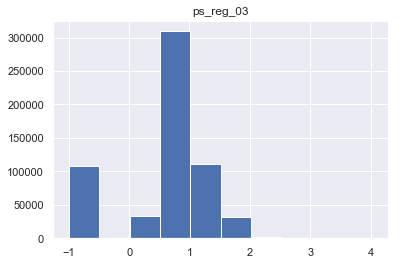

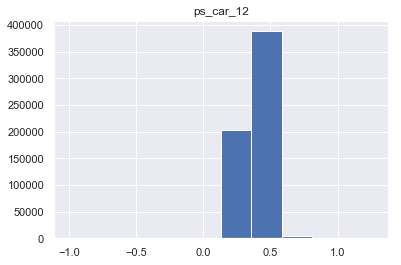

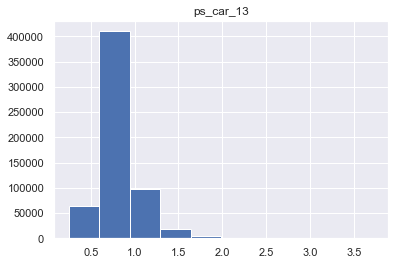

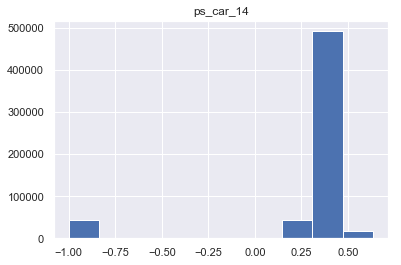

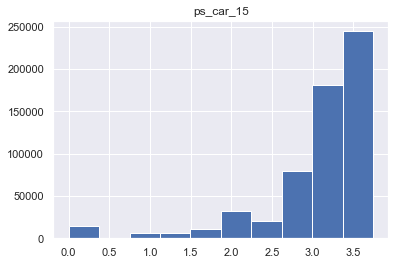

The histogram for columns which falls under Nomial variables


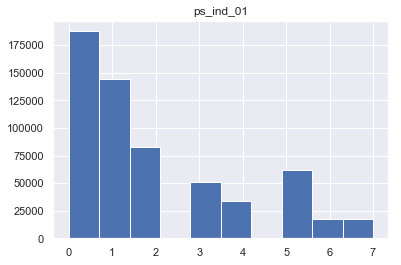

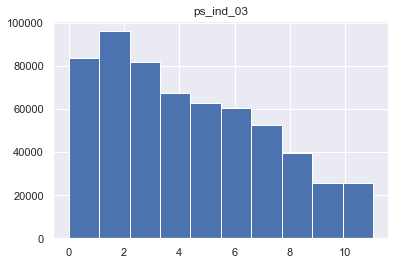

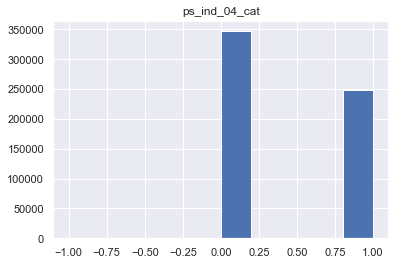

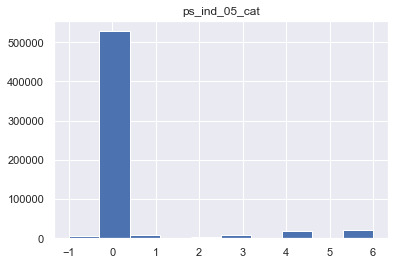

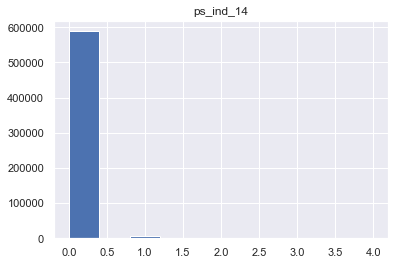

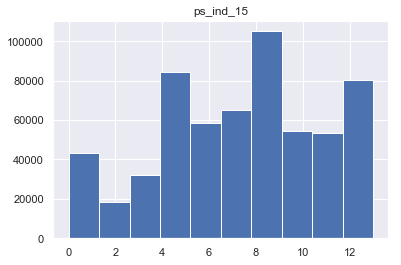

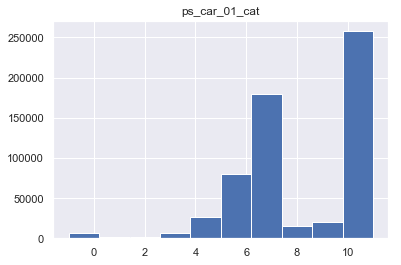

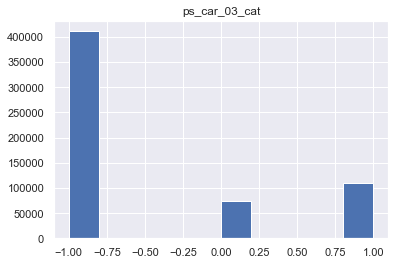

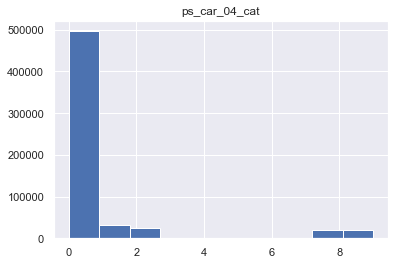

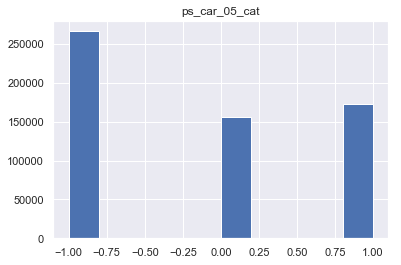

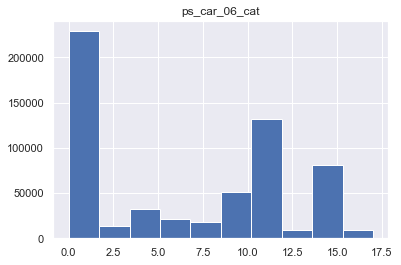

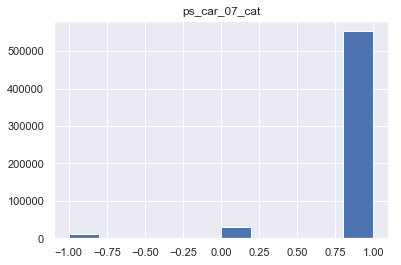

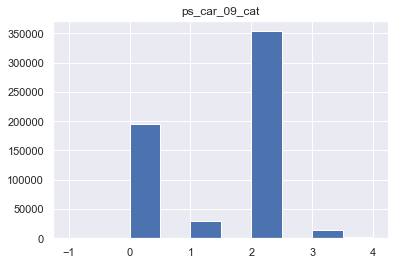

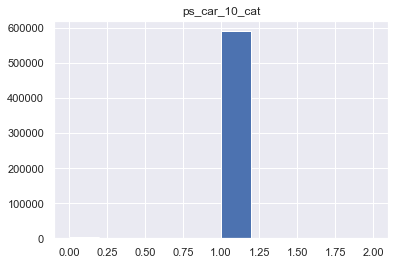

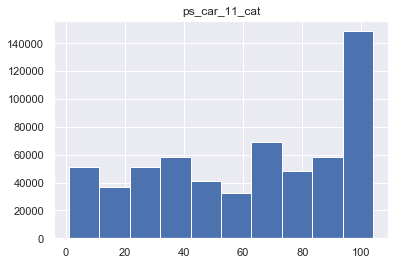

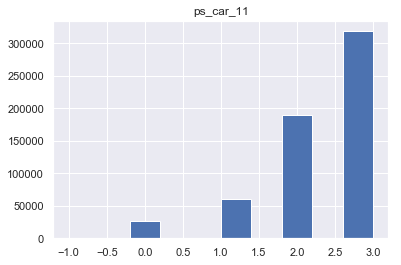

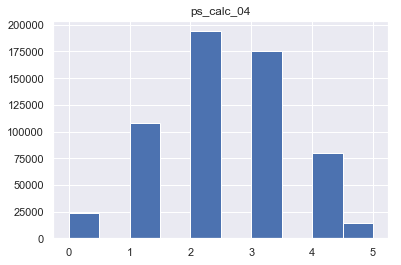

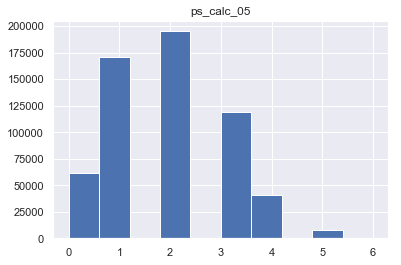

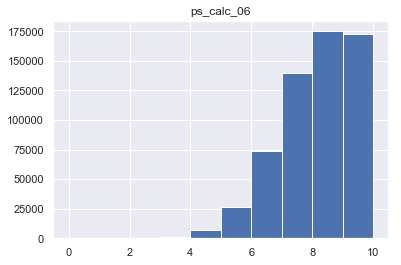

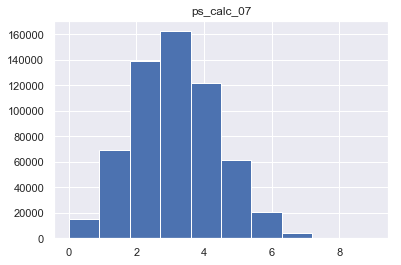

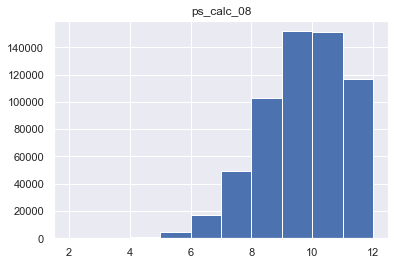

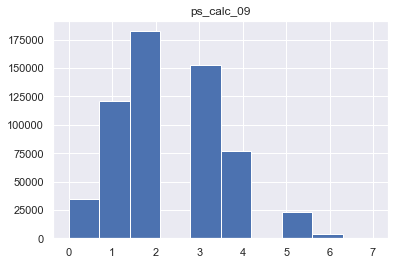

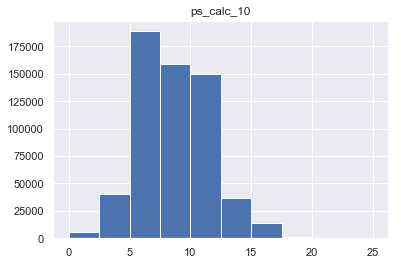

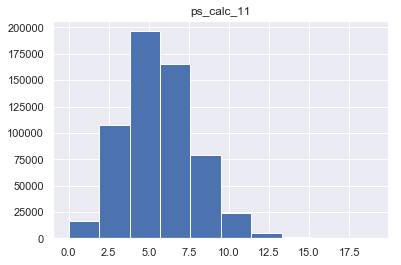

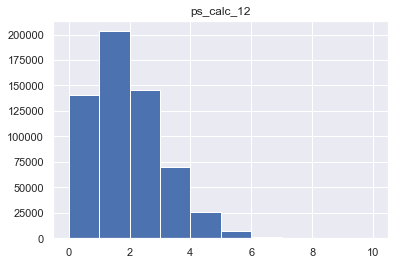

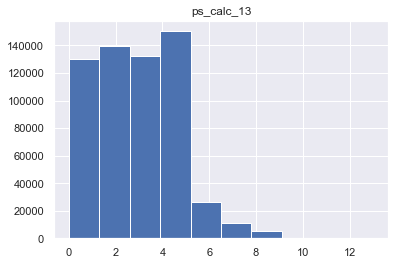

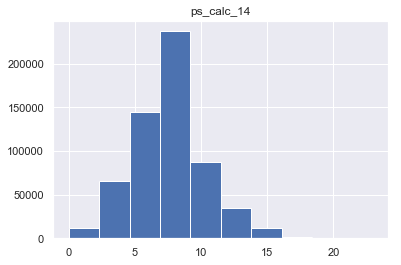

In [11]:
print('The histogram for columns which falls under Nomial variables')
variables=['ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15']
for name in variables:
    plt.hist(df[name])
    plt.title(name)
    plt.show()
print('The histogram for columns which falls under Nomial variables')
variables=list(Unique_value_df[Unique_value_df['Type_Variable']=='Ordinal']['Type'])
for name in variables:
    plt.hist(df[name], bins=10)
    plt.title(name)
    plt.show()

In [12]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)


ohe_df = df.select_dtypes(include=[object])
ohe_df.head(3)
ohe=OneHotEncoder(categories='auto')
ohe_fit_df=ohe.fit(df)


[]


In [13]:
print(" * Number of columns prossessing NAN values are : ", len(Unique_value_df[Unique_value_df['Nan_Count']>1]))
print(" * Out of %d dataframe columns there are %d number of columns for Binary variable"%(len(df.columns),len(Unique_value_df[Unique_value_df['Type_Variable']=='Binary'])))
print(" * Out of %d dataframe columns there are %d number of columns for Categorical variable"%(len(df.columns),len(Unique_value_df[Unique_value_df['Type_Variable']=='Ordinal'])))
print(" * Out of %d Ordinal column variables there are %d such column where the ordered value contains negative numbers."%(len(Unique_value_df[Unique_value_df['Type_Variable']=='Ordinal']),len(Unique_value_df[(Unique_value_df['Contains_Negative']=="yes") &  (Unique_value_df['Type_Variable']=='Ordinal')])    ))
print(" * Out of %d Binary column variables there are %d such column where number of zeros contains 99percent of the data.These columns should be discarded as they have no significant effect on modelling."%(len(binary_group_summary),len(binary_group_summary[binary_group_summary["zero's_percent"]>99])))    
print(" * The Target variable contains %f percentage of zeros and %f percentage of ones."%(df['target'].value_counts(normalize=True)[0]*100,df['target'].value_counts(normalize=True)[1]*100))         
print(" * After downsampling the majority class in target column in order to achieve 12 percentage achieving balance for minority class %d total number of training records has formed"%(len(downsample_by_zero)))         
print(" * The dataframe consist of no two columns are strongly related that can satify an absolute corelation greater than value 0.5.")         
print(" * From Nominal variable column type, column 'ps_reg_03', 'ps_car_14' and 'ps_car_15' should be consider for StandardScaler")
print(" * From Interval variable column type, column 'ps_ind_01', 'ps_car_01_cat','ps_car_04_cat' and 'ps_car_05_cat' should be consider for StandardScaler")

 * Number of columns prossessing NAN values are :  0
 * Out of 59 dataframe columns there are 20 number of columns for Binary variable
 * Out of 59 dataframe columns there are 27 number of columns for Categorical variable
 * Out of 27 Ordinal column variables there are 8 such column where the ordered value contains negative numbers.
 * Out of 20 Binary column variables there are 4 such column where number of zeros contains 99percent of the data.These columns should be discarded as they have no significant effect on modelling.
 * The Target variable contains 96.355248 percentage of zeros and 3.644752 percentage of ones.
 * After downsampling the majority class in target column in order to achieve 12 percentage achieving balance for minority class 180783 total number of training records has formed
 * The dataframe consist of no two columns are strongly related that can satify an absolute corelation greater than value 0.5.
 * From Nominal variable column type, column 'ps_reg_03', 'ps_car_

<h3>The following inferences can be concluded from the dataset given: </h3>
<ol type="number">
    <li>There are no NAN values in the dataset.</li>
    <li>Out of 59 dataframe columns there are 20 number of columns for Binary variable.</li>
    <li>Out of 59 dataframe columns there are 27 number of columns for Categorical variable</li>
    <li> Out of 27 Ordinal column variables there are 8 such column where the ordered value contains negative numbers.</li>
    <li>Out of 20 Binary column variables there are 4 such column where number of zeros contains 99% of the data. These colums should be discarded as they have no significant effect on modelling.</li>
    <li> The Target variable contains 96.355248 percentage of zeros and 3.644752 percentage of ones respectively.</li>
     <li>To balance the target variable we need to downsampling the majority class in the target variable.</li>
    <li>Function 'downsample' converts the dataframe into desired acheiving balance of the minority class.</li>
    <li>The dataframe consist of no two columns are strongly related that can satify an absolute corelation greater than value 0.5</li>
    <li>From Interval variable column type, column 'ps_ind_01', 'ps_car_01_cat','ps_car_04_cat' and 'ps_car_05_cat' should be consider for StandardScaler.</li>
    </ol>